In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
mean=[4,6]
covar1=[[2,0.7],[0.7,1]]

d1=np.random.multivariate_normal(mean,covar1,500)
#print(d1.shape)
#print(d1)

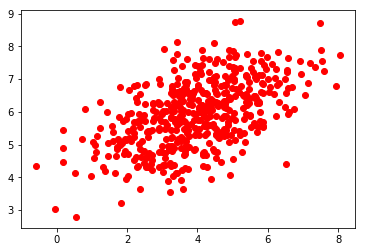

In [23]:
plt.scatter(d1[:,0],d1[:,1],color="red")
plt.show()

In [25]:
mean1=[4,6]
covar1=[[2,0.4],[0.4,1]]

d1=np.random.multivariate_normal(mean1,covar1,500)

mean2=[2,3]
covar2=[[2,0.2],[0.2,1]]

d2=np.random.multivariate_normal(mean2,covar2,500)

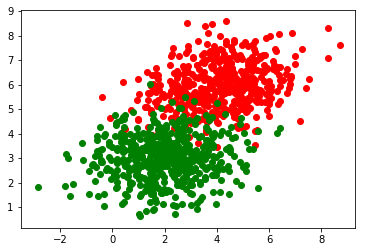

In [26]:
plt.scatter(d1[:,0],d1[:,1],color="red")
plt.scatter(d2[:,0],d2[:,1],color="green")
plt.show()

In [27]:
print(d1.shape)
print(d2.shape)

(500, 2)
(500, 2)


# Create Dataset

In [44]:
dataset=np.zeros((d1.shape[0]+d2.shape[0],d1.shape[1]+1))
print(dataset.shape)
dataset[:d1.shape[0],:2]=d1
dataset[d1.shape[0]:,:2]=d2
dataset[d1.shape[0]:,-1]=1
print(dataset)
np.random.shuffle(dataset)
print(dataset)

(1000, 3)
[[4.50012302 5.952112   0.        ]
 [3.51226025 5.83683565 0.        ]
 [5.87094982 5.59596456 0.        ]
 ...
 [1.03873192 0.72465693 1.        ]
 [0.1927926  2.00634797 1.        ]
 [5.37413767 3.36921989 1.        ]]
[[4.34009396 3.38898405 1.        ]
 [1.71024478 5.94161832 0.        ]
 [2.65903254 5.75894812 0.        ]
 ...
 [0.5859304  2.93485234 1.        ]
 [3.7478005  6.03202179 0.        ]
 [2.48935967 2.67596775 1.        ]]


In [45]:
split=(int)(0.8*dataset.shape[0])
print(split)

800


In [52]:
X_train=dataset[:split,:2]
y_train=dataset[:split,-1]

X_test=dataset[split:,:2]
y_test=dataset[split:,-1]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 2)
(800,)
(200, 2)
(200,)


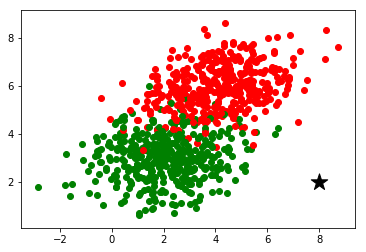

In [80]:
#label 0 is for red and label 1 is for green
test_point=[8,2]
for point,label in zip(X_train,y_train):
    if label==0:
        plt.scatter(point[0],point[1],color="red")
    else:
        plt.scatter(point[0],point[1],color="green")
plt.scatter(test_point[0],test_point[1],color="black",s=300,marker="*")
plt.show()

In [81]:
def eucledian_distance(x,y):
    return np.sqrt(np.sum((x-y)**2))


In [82]:
point1=np.array([3,5])
point2=np.array([1,2])
dist=eucledian_distance(point1,point2)
print(dist)

3.605551275463989


In [83]:
def knn(x_train,y_train,test_point,k=5):
    #1. make an empty distance list and fill that list with distances from all points from training set.
    distances=[]
    for point,label in zip(x_train,y_train):
        dist=eucledian_distance(point,test_point)
        distances.append((dist,label))
    #2. sort on basis of distances
    distances=sorted(distances, key=lambda x:x[0])
    distances=np.array(distances)
    #3. select k nearest neighbors
    distances=distances[:k]
    
    freq=np.unique(distances[:,1],return_counts=True)
    labels,counts=freq
    ans=labels[counts.argmax()]
    
    return ans

In [84]:
pred=knn(X_train,y_train,test_point,k=10)
print(pred)

1.0


In [85]:
def get_all_predictions(x_train,y_train,x_test,k=5):
    predictions=[]
    for test_point in x_test:
        test_label=knn(x_train,y_train,test_point,k)
        predictions.append(test_label)
    return predictions

In [86]:
all_predictions=get_all_predictions(X_train,y_train,X_test,k=5)
print(all_predictions)

[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]

In [89]:
def get_accuracy(predictions,true_labels):
    return (predictions==true_labels).sum()/true_labels.shape[0]

In [90]:
print(get_accuracy(all_predictions,y_test))

0.93
